In [10]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [11]:
# Reading the dataset
data_tests = pd.read_csv('Country-wise_data_testing_information/South_Korea_data.csv')
data_policy = pd.read_csv('Cases_and_policies_Country_wise/South_Korea_Covid_Policies.csv')

In [12]:
# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_policy['dateRep'], format = '%d/%m/%Y')
# Adding dates to the dataframe
data_policy['Date'] = dates

# Reading the dataset
#data = pd.read_csv('Country-wise_data_testing_information/India_data.csv')

# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_tests['dateRep'], format = '%d-%m-%Y')

# Adding dates to the dataframe
data_tests['Date'] = dates

# Removing the original object datatype
# data = data.drop(labels = ['day'], axis = 1)

In [13]:
# Dataset Preprocessing before running the model
def dataset_preprocess_policy(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
#     ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
#     df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    #df = df.drop(['Country', 'day', 'Country Name', 'Region','Unnamed: 0', ], axis = 1)
    df = df.drop(['countriesAndTerritories', 'geoId', 'dateRep', 'countryterritoryCode','Unnamed: 0', 'day', 'month','year','popData2018'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [14]:
# Dataset Preprocessing before running the model
def dataset_preprocess_tests(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
#     ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
#     df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    #df = df.drop(['Country', 'day', 'Country Name', 'Region'], axis = 1)
    df = df.drop(['countriesAndTerritories', 'geoId', 'dateRep', 'countryterritoryCode', 'cases', 'deaths'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [15]:
data_policy = dataset_preprocess_policy(data_policy)
data_tests = dataset_preprocess_tests(data_tests)

In [16]:
merge=pd.merge(data_tests,data_policy, how='inner', left_index=True, right_index=True)

In [17]:
merge.to_csv('Full Dataset/South_Korea_Covid.csv')

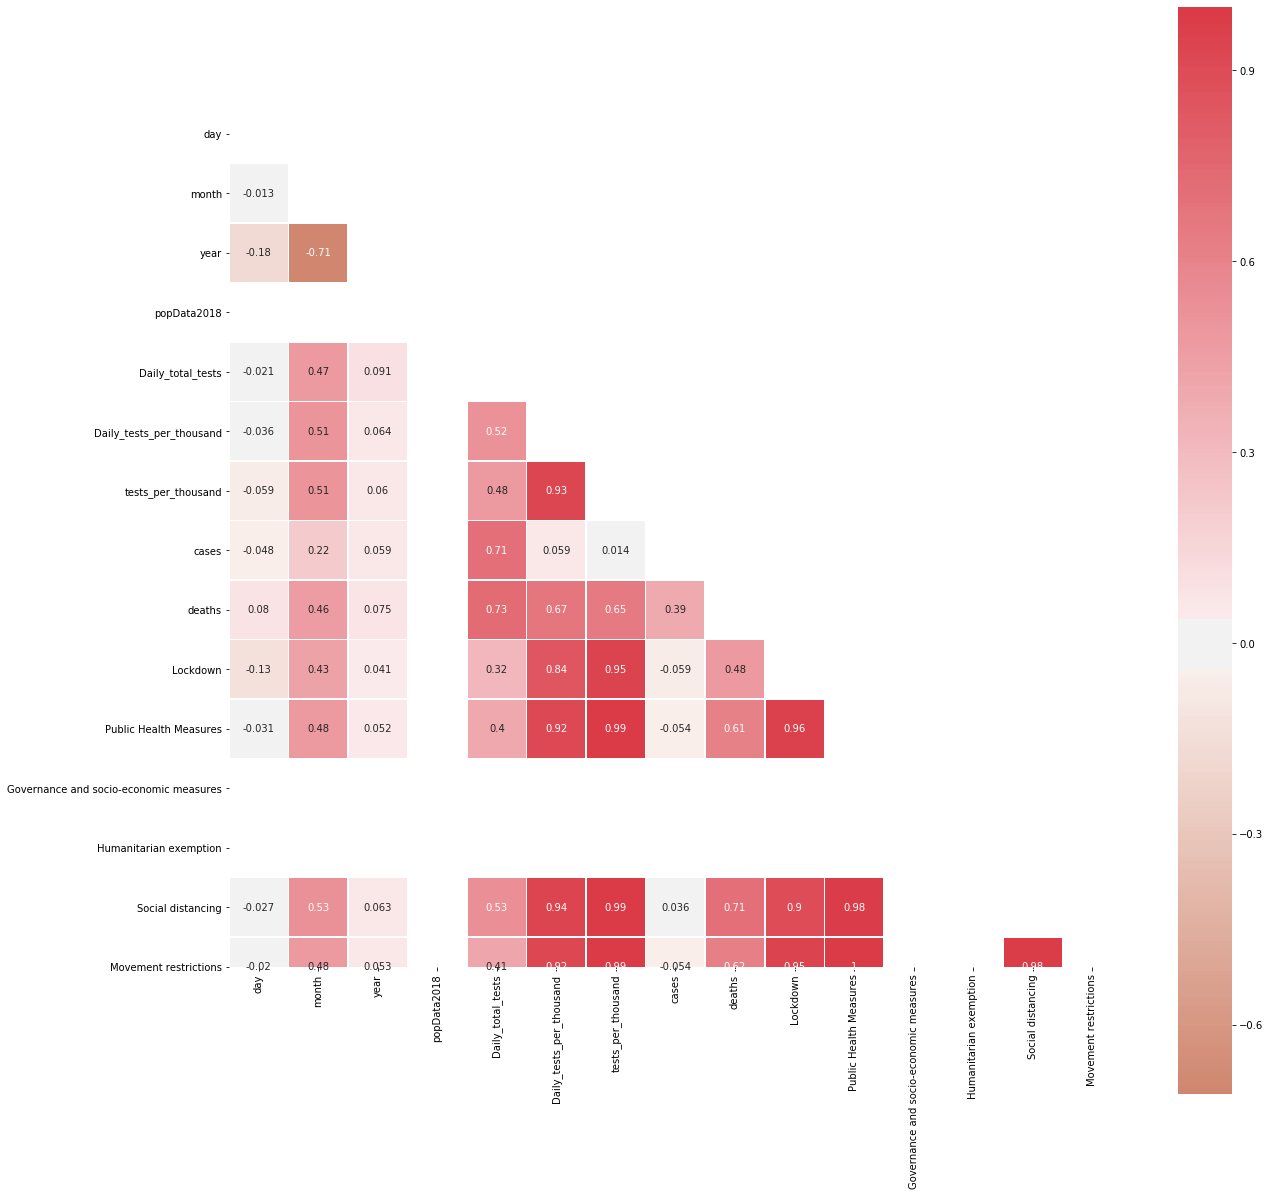

In [18]:
# Compute the correlation matrix
corr = merge.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 40))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})